In [ ]:
# !pip install jpype1
# !pip install konlpy
# !curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

# **1. 데이터 로드**

In [ ]:
import json

with open('/content/drive/MyDrive/article/valid.json', "r", encoding="utf-8") as f:
    data = json.loads(f.read())

In [ ]:
data.keys()

dict_keys(['name', 'delivery_date', 'documents'])

In [ ]:
data['documents'][0].keys()

dict_keys(['id', 'category', 'media_type', 'media_sub_type', 'media_name', 'size', 'char_count', 'publish_date', 'title', 'text', 'annotator_id', 'document_quality_scores', 'extractive', 'abstractive'])

In [ ]:
data['documents'][0]

{'id': '340626877',
 'category': '정치',
 'media_type': 'online',
 'media_sub_type': '경제지',
 'media_name': '한국경제',
 'size': 'medium',
 'char_count': '1111',
 'publish_date': '2019-04-08 17:43:00',
 'title': '文대통령 "5G는 4차산업혁명 시대의 고속도로"',
 'text': [[{'index': 0,
    'sentence': '[ 박재원 기자 ] \'대한민국 5G 홍보대사\'를 자처한 문재인 대통령은 "넓고, 체증 없는 \'통신 고속도로\'가 5G"라며 "대한민국의 대전환이 이제 막 시작됐다"고 기대감을 높였다.',
    'highlight_indices': '80,82'}],
  [{'index': 1,
    'sentence': '문 대통령은 8일 서울 올림픽공원에서 열린 5G플러스 전략발표에 참석해 "5G 시대는 우리가 생각하고, 만들면 그것이 세계 표준이 되는 시대"라며 "5G는 대한민국 혁신성장의 인프라"라고 강조했다.',
    'highlight_indices': ''},
   {'index': 2,
    'sentence': "산업화 시대에 고속도로가 우리 경제의 '대동맥' 역할을 했듯, 5G가 4차 산업혁명 시대의 고속도로가 돼 새로운 기회를 열어 줄 것이란 설명이다.",
    'highlight_indices': ''}],
  [{'index': 3,
    'sentence': '문 대통령은 "5G가 각 분야에 융합되면, 정보통신산업을 넘어 자동차, 드론(무인항공기), 로봇, 지능형 폐쇄회로TV(CCTV)를 비롯한 제조업과 벤처에 이르기까지 우리 산업 전체의 혁신을 통한 동반성장이 가능하다"고 밝혔다.',
    'highlight_indices': '12,13'},
   {'index': 4,
    'sentence': '세계 최초 상용화에 성공한 5G가 반도체를 이을

In [ ]:
# 본문
sentence_list = []

for i in range(len(data['documents'])):
  sentence = []
  for j in range(len(data['documents'][i]['text'])):
    for k in range(len(data['documents'][i]['text'][j])):
      sentence.append(data['documents'][i]['text'][j][k]['sentence'])
  # print(sentence)
  sentence_list.append(sentence)

# sentence_list

In [ ]:
import re

for i in range(len(data['documents'])):
  for j in range(len(sentence_list[i])):
    sentence_list[i][j] = re.sub(r'\[[^)]*\]', '', sentence_list[i][j])
    sentence_list[i][j] = re.sub(r'\([^)]*\)', '', sentence_list[i][j])
    sentence_list[i][j] = re.sub('[\]\>]', '', sentence_list[i][j])

In [ ]:
len(sentence_list)
sentence_list[:2]

[[' \'대한민국 5G 홍보대사\'를 자처한 문재인 대통령은 "넓고, 체증 없는 \'통신 고속도로\'가 5G"라며 "대한민국의 대전환이 이제 막 시작됐다"고 기대감을 높였다.',
  '문 대통령은 8일 서울 올림픽공원에서 열린 5G플러스 전략발표에 참석해 "5G 시대는 우리가 생각하고, 만들면 그것이 세계 표준이 되는 시대"라며 "5G는 대한민국 혁신성장의 인프라"라고 강조했다.',
  "산업화 시대에 고속도로가 우리 경제의 '대동맥' 역할을 했듯, 5G가 4차 산업혁명 시대의 고속도로가 돼 새로운 기회를 열어 줄 것이란 설명이다.",
  '문 대통령은 "5G가 각 분야에 융합되면, 정보통신산업을 넘어 자동차, 드론, 로봇, 지능형 폐쇄회로TV를 비롯한 제조업과 벤처에 이르기까지 우리 산업 전체의 혁신을 통한 동반성장이 가능하다"고 밝혔다.',
  '세계 최초 상용화에 성공한 5G가 반도체를 이을 우리 경제의 새 먹거리가 될 것이란 관측이다.',
  '정부는 2026년 세계 5G 시장 규모가 1161조원에 달할 것으로 보고 있다.',
  '작년 반도체 시장 규모가 529조원인 점을 고려하면 2배 이상 큰 미래 시장이 창출되는 셈이다.',
  '문 대통령은 아직은 국민에게 다소 낯선 5G 시대의 미래상을 친절히 설명해 눈길을 끌기도 했다.',
  '문 대통령은 "\'지금 스마트폰으로 충분한데, 5G가 왜 필요하지?\'라고 생각할 수 있다"며 "4세대 이동통신은 \'아직은\' 빠르지만 가까운 미래에는 결코 빠르지 않다"고 했다.',
  '그러면서 "자동차가 많아질수록 더 넓은 길이 필요한 것처럼 사물과 사물을 연결하고, 데이터를 주고받는 이동통신망도 더 넓고 빠른 길이 필요하다"고 덧붙였다.',
  '문 대통령은 세계 최초 상용화에 성공한 우리 5G 기술을 널리 알리는 홍보대사를 자처하기도 했다.',
  '5G 시장을 선점하기 위한 각국의 경쟁이 뜨겁게 달아오른 만큼 정부 차원에서 적극 지원하겠다는 방침이다.',
  '문 대통령은 "평창동계올림픽 360도 중계,

In [ ]:
import re

text_list = []

for i in range(len(data['documents'])):
  text = ''
  txt = []
  for j in range(len(sentence_list[i])):
    sent = re.sub(r'\[[^)]*\]', '', sentence_list[i][j])   # 대괄호 내용 삭제
    sent = re.sub(r'\([^)]*\)', '', sent)   # 괄호 내용 삭제
    # sent = re.sub('["\]\>\']', '', sent)   # 따옴표, 특수문자 삭제
    sent = re.sub('[\]\>]', '', sent)   # 따옴표, 특수문자 삭제
    text += sent
    if j != (len(sentence_list[i]) - 1):
      text += ' '
  txt.append(text)
  text_list.append(txt)

# text_list

In [ ]:
len(text_list)
text_list[:2]

[[' \'대한민국 5G 홍보대사\'를 자처한 문재인 대통령은 "넓고, 체증 없는 \'통신 고속도로\'가 5G"라며 "대한민국의 대전환이 이제 막 시작됐다"고 기대감을 높였다. 문 대통령은 8일 서울 올림픽공원에서 열린 5G플러스 전략발표에 참석해 "5G 시대는 우리가 생각하고, 만들면 그것이 세계 표준이 되는 시대"라며 "5G는 대한민국 혁신성장의 인프라"라고 강조했다. 산업화 시대에 고속도로가 우리 경제의 \'대동맥\' 역할을 했듯, 5G가 4차 산업혁명 시대의 고속도로가 돼 새로운 기회를 열어 줄 것이란 설명이다. 문 대통령은 "5G가 각 분야에 융합되면, 정보통신산업을 넘어 자동차, 드론, 로봇, 지능형 폐쇄회로TV를 비롯한 제조업과 벤처에 이르기까지 우리 산업 전체의 혁신을 통한 동반성장이 가능하다"고 밝혔다. 세계 최초 상용화에 성공한 5G가 반도체를 이을 우리 경제의 새 먹거리가 될 것이란 관측이다. 정부는 2026년 세계 5G 시장 규모가 1161조원에 달할 것으로 보고 있다. 작년 반도체 시장 규모가 529조원인 점을 고려하면 2배 이상 큰 미래 시장이 창출되는 셈이다. 문 대통령은 아직은 국민에게 다소 낯선 5G 시대의 미래상을 친절히 설명해 눈길을 끌기도 했다. 문 대통령은 "\'지금 스마트폰으로 충분한데, 5G가 왜 필요하지?\'라고 생각할 수 있다"며 "4세대 이동통신은 \'아직은\' 빠르지만 가까운 미래에는 결코 빠르지 않다"고 했다. 그러면서 "자동차가 많아질수록 더 넓은 길이 필요한 것처럼 사물과 사물을 연결하고, 데이터를 주고받는 이동통신망도 더 넓고 빠른 길이 필요하다"고 덧붙였다. 문 대통령은 세계 최초 상용화에 성공한 우리 5G 기술을 널리 알리는 홍보대사를 자처하기도 했다. 5G 시장을 선점하기 위한 각국의 경쟁이 뜨겁게 달아오른 만큼 정부 차원에서 적극 지원하겠다는 방침이다. 문 대통령은 "평창동계올림픽 360도 중계, 작년 4·27 남북한 정상회담 때 프레스센터에서 사용된 스마트월처럼 기회가 생기면 대통령부터 나서서 우

In [ ]:
# 추출요약문
ext_list = []

for i in range(len(data['documents'])):   # len(data['documents'])
  sentence = []
  index = data['documents'][i]['extractive']
  for j in range(len(data['documents'][i]['text'])):
    for k in range(len(data['documents'][i]['text'][j])):
      for l in range(len(index)):
        if data['documents'][i]['text'][j][k]['index'] == index[l]:
          sentence.append(data['documents'][i]['text'][j][k]['sentence'])
  ext_list.append(sentence)

# ext_list

In [ ]:
len(ext_list)
ext_list[:2]

[['[ 박재원 기자 ] \'대한민국 5G 홍보대사\'를 자처한 문재인 대통령은 "넓고, 체증 없는 \'통신 고속도로\'가 5G"라며 "대한민국의 대전환이 이제 막 시작됐다"고 기대감을 높였다.',
  '문 대통령은 8일 서울 올림픽공원에서 열린 5G플러스 전략발표에 참석해 "5G 시대는 우리가 생각하고, 만들면 그것이 세계 표준이 되는 시대"라며 "5G는 대한민국 혁신성장의 인프라"라고 강조했다.',
  '문 대통령은 "5G가 각 분야에 융합되면, 정보통신산업을 넘어 자동차, 드론(무인항공기), 로봇, 지능형 폐쇄회로TV(CCTV)를 비롯한 제조업과 벤처에 이르기까지 우리 산업 전체의 혁신을 통한 동반성장이 가능하다"고 밝혔다.'],
 ['바른미래당이 8일 연 최고위원 회의에는 7명의 최고위원 중 손학규 대표와 김관영 원내대표만 참석했다.',
  '바른정당계 하태경·이준석·권은희 최고위원은 지도부 총사퇴를 요구하며 회의를 보이콧했다.',
  '그러나 바른정당계 최고위원들은 이날도 지도부 퇴진을 요구했다.']]

In [ ]:
import re

sumExt_list = []

for i in range(len(data['documents'])):
  text = ''
  txt = []
  for j in range(len(ext_list[i])):
    sent = re.sub(r'\[[^)]*\]', '', ext_list[i][j])   # 대괄호 내용 삭제
    sent = re.sub(r'\([^)]*\)', '', sent)   # 괄호 내용 삭제
    # sent = re.sub('["\]\>\']', '', sent)   # 따옴표, 특수문자 삭제
    sent = re.sub('[\]\>]', '', sent)   # 따옴표, 특수문자 삭제
    text += sent
    if j != (len(ext_list[i]) - 1):
      text += ' '
  txt.append(text)
  sumExt_list.append(txt)

# sumExt_list

In [ ]:
len(sumExt_list)
sumExt_list[:2]

[[' \'대한민국 5G 홍보대사\'를 자처한 문재인 대통령은 "넓고, 체증 없는 \'통신 고속도로\'가 5G"라며 "대한민국의 대전환이 이제 막 시작됐다"고 기대감을 높였다. 문 대통령은 8일 서울 올림픽공원에서 열린 5G플러스 전략발표에 참석해 "5G 시대는 우리가 생각하고, 만들면 그것이 세계 표준이 되는 시대"라며 "5G는 대한민국 혁신성장의 인프라"라고 강조했다. 문 대통령은 "5G가 각 분야에 융합되면, 정보통신산업을 넘어 자동차, 드론, 로봇, 지능형 폐쇄회로TV를 비롯한 제조업과 벤처에 이르기까지 우리 산업 전체의 혁신을 통한 동반성장이 가능하다"고 밝혔다.'],
 ['바른미래당이 8일 연 최고위원 회의에는 7명의 최고위원 중 손학규 대표와 김관영 원내대표만 참석했다. 바른정당계 하태경·이준석·권은희 최고위원은 지도부 총사퇴를 요구하며 회의를 보이콧했다. 그러나 바른정당계 최고위원들은 이날도 지도부 퇴진을 요구했다.']]

In [ ]:
# 생성요약문
sumAbs_list = []

for i in range(len(data['documents'])):
  sumAbs_list.append(data['documents'][i]['abstractive'])

# summary_list

In [ ]:
len(sumAbs_list)
sumAbs_list[:2]

[['8일 서울에서 열린 5G플러스 전략발표에 참석한 문재인 대통령은 5G는 대한민국 혁신성장의 인프라이자 "넓고, 체증 없는 \'통신 고속도로\'"라고 강조하며 5G가 각 분양에 융합되면 정보통신산업을 넘어 제조업과 벤처에 이르러 우리 산업 전체의 혁신을 통한 동반성장이 가능하다고 언급했다.'],
 ['8일 바른미래당 최고의원 회의에 하태경 의원 등 5명의 최고의원이 지도부 퇴진을 요구하며 불참했다.']]

# **2. 추출요약**

In [ ]:
import pandas as pd

df_text = pd.DataFrame(text_list)
df_sumExt = pd.DataFrame(sumExt_list)
df_sumAbs = pd.DataFrame(sumAbs_list)
df = pd.concat([df_text, df_sumExt, df_sumAbs], axis=1)
df.columns = ['text', 'sumExt', 'sumAbs']
df

,text,sumExt,sumAbs
0,"'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고...","'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고...",8일 서울에서 열린 5G플러스 전략발표에 참석한 문재인 대통령은 5G는 대한민국 혁...
1,당 지도부 퇴진을 놓고 바른미래당 내홍이 격화되고 있다. 바른미래당이 8일 연 최...,바른미래당이 8일 연 최고위원 회의에는 7명의 최고위원 중 손학규 대표와 김관영 원...,8일 바른미래당 최고의원 회의에 하태경 의원 등 5명의 최고의원이 지도부 퇴진을 요...
2,8일 서울 올림픽공원 K아트홀. 지난 3일 한국이 세계 최초로 5세대 이동통신 서...,지난 3일 한국이 세계 최초로 5세대 이동통신 서비스를 상용화한 것을 기념하는 '코...,지난 3일 한국이 세계 첫 5세대 이동통신 서비스를 보편화한 것을 축하하는 '코리안...
3,박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아냈...,박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아냈...,박원순 서울시장은 8일 서울시청에서 열린 '골목길 재생 시민 정책 대화'에 참석하여...
4,"""SK와 미국 알파벳의 간결한 지배구조를 배워라."" 기업 지배구조 개선 등을 통해...",기업 지배구조 개선 등을 통해 높은 수익률을 올리는 것을 목표로 하는 공모펀드 'K...,주주가치 포커스를 운용하는 KB자산운용이 SK와 알파벳(구글 지주회사)의 모범적 ...
...,...,...,...
30117,영주시는 이억만리에서 건너온 계절근로자들의 향수를 달래고 안정된 한국생활 적응을 돕...,영주시는 이억만리에서 건너온 계절근로자들의 향수를 달래고 안정된 한국생활 적응을 돕...,"영주시는 외국인 근로자들의 향수를 달래고, 안정적인 한국생활 적응을 지원하기 위해 ..."
30118,여름 방학을 맞아 전국의 국립과학관에서 달 탐사 50주년과 국제천문연맹 설립 100...,여름 방학을 맞아 전국의 국립과학관에서 달 탐사 50주년과 국제천문연맹 설립 100...,달 탐사 50주년과 국제천문연맹(IAU)설립 100주년 기념하는 특별전시가 전국의 ...
30119,영주문경예천 당원협의회 시국강연 및 당원교육에 참석차 영주를 방문한 황교안 자유한국...,영주문경예천 당원협의회 시국강연 및 당원교육에 참석차 영주를 방문한 황교안 자유한국...,황교안 대표는 지난 29일 자유한국당 대표로 경북 영주문경예청 당원협의회 당원교육에...
30120,경북예천군은 장기적인 국내 경기침체가 지속됨에 따라 사회적경제 기업 육성 등을 통한...,경북예천군은 장기적인 국내 경기침체가 지속됨에 따라 사회적경제 기업 육성 등을 통한...,경북예천군은 사회적경제 기업 육성 등을 통한 일자리 창출에 행정동력을 집중한 결과 ...


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('punkt')

# df['sentences'] = df['text'].apply(sent_tokenize)

df['sentences'] = ''
for i in range(len(df)):
  df['sentences'][i] = sentence_list[i]
df

,text,sumExt,sumAbs,sentences
0,"'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고...","'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고...",8일 서울에서 열린 5G플러스 전략발표에 참석한 문재인 대통령은 5G는 대한민국 혁...,"[ '대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 ..."
1,당 지도부 퇴진을 놓고 바른미래당 내홍이 격화되고 있다. 바른미래당이 8일 연 최...,바른미래당이 8일 연 최고위원 회의에는 7명의 최고위원 중 손학규 대표와 김관영 원...,8일 바른미래당 최고의원 회의에 하태경 의원 등 5명의 최고의원이 지도부 퇴진을 요...,"[ 당 지도부 퇴진을 놓고 바른미래당 내홍이 격화되고 있다., 바른미래당이 8일 연..."
2,8일 서울 올림픽공원 K아트홀. 지난 3일 한국이 세계 최초로 5세대 이동통신 서...,지난 3일 한국이 세계 최초로 5세대 이동통신 서비스를 상용화한 것을 기념하는 '코...,지난 3일 한국이 세계 첫 5세대 이동통신 서비스를 보편화한 것을 축하하는 '코리안...,"[ 8일 서울 올림픽공원 K아트홀., 지난 3일 한국이 세계 최초로 5세대 이동통신..."
3,박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아냈...,박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아냈...,박원순 서울시장은 8일 서울시청에서 열린 '골목길 재생 시민 정책 대화'에 참석하여...,[ 박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아...
4,"""SK와 미국 알파벳의 간결한 지배구조를 배워라."" 기업 지배구조 개선 등을 통해...",기업 지배구조 개선 등을 통해 높은 수익률을 올리는 것을 목표로 하는 공모펀드 'K...,주주가치 포커스를 운용하는 KB자산운용이 SK와 알파벳(구글 지주회사)의 모범적 ...,"[ ""SK와 미국 알파벳의 간결한 지배구조를 배워라."", 기업 지배구조 개선 등을 ..."
...,...,...,...,...
30117,영주시는 이억만리에서 건너온 계절근로자들의 향수를 달래고 안정된 한국생활 적응을 돕...,영주시는 이억만리에서 건너온 계절근로자들의 향수를 달래고 안정된 한국생활 적응을 돕...,"영주시는 외국인 근로자들의 향수를 달래고, 안정적인 한국생활 적응을 지원하기 위해 ...",[영주시는 이억만리에서 건너온 계절근로자들의 향수를 달래고 안정된 한국생활 적응을 ...
30118,여름 방학을 맞아 전국의 국립과학관에서 달 탐사 50주년과 국제천문연맹 설립 100...,여름 방학을 맞아 전국의 국립과학관에서 달 탐사 50주년과 국제천문연맹 설립 100...,달 탐사 50주년과 국제천문연맹(IAU)설립 100주년 기념하는 특별전시가 전국의 ...,[여름 방학을 맞아 전국의 국립과학관에서 달 탐사 50주년과 국제천문연맹 설립 10...
30119,영주문경예천 당원협의회 시국강연 및 당원교육에 참석차 영주를 방문한 황교안 자유한국...,영주문경예천 당원협의회 시국강연 및 당원교육에 참석차 영주를 방문한 황교안 자유한국...,황교안 대표는 지난 29일 자유한국당 대표로 경북 영주문경예청 당원협의회 당원교육에...,[영주문경예천 당원협의회 시국강연 및 당원교육에 참석차 영주를 방문한 황교안 자유한...
30120,경북예천군은 장기적인 국내 경기침체가 지속됨에 따라 사회적경제 기업 육성 등을 통한...,경북예천군은 장기적인 국내 경기침체가 지속됨에 따라 사회적경제 기업 육성 등을 통한...,경북예천군은 사회적경제 기업 육성 등을 통한 일자리 창출에 행정동력을 집중한 결과 ...,[경북예천군은 장기적인 국내 경기침체가 지속됨에 따라 사회적경제 기업 육성 등을 통...


In [ ]:
print('text의 유일한 샘플 수:', df['text'].nunique())
print('sumExt의 유일한 샘플 수:', df['sumExt'].nunique())
print('sumAbs의 유일한 샘플 수:', df['sumAbs'].nunique())

text의 유일한 샘플 수: 29798
sumExt의 유일한 샘플 수: 30053
sumAbs의 유일한 샘플 수: 30122


In [ ]:
# Text에서 중복 제거
df.drop_duplicates(subset=['text'], inplace=True)
print("전체 샘플 수 :", len(df))

전체 샘플 수 : 29798


In [ ]:
# 널값 확인
print(df.isnull().sum())

text         0
sumExt       0
sumAbs       0
sentences    0
dtype: int64


In [ ]:
df = df[:5000]
df

# # random
# df = df.sample(n=5000, replace=False)
# df = df.reset_index()
# df = df.drop('index', axis=1)
# df

,text,sumExt,sumAbs,sentences
0,"'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고...","'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고...",8일 서울에서 열린 5G플러스 전략발표에 참석한 문재인 대통령은 5G는 대한민국 혁...,"[ '대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 ..."
1,당 지도부 퇴진을 놓고 바른미래당 내홍이 격화되고 있다. 바른미래당이 8일 연 최...,바른미래당이 8일 연 최고위원 회의에는 7명의 최고위원 중 손학규 대표와 김관영 원...,8일 바른미래당 최고의원 회의에 하태경 의원 등 5명의 최고의원이 지도부 퇴진을 요...,"[ 당 지도부 퇴진을 놓고 바른미래당 내홍이 격화되고 있다., 바른미래당이 8일 연..."
2,8일 서울 올림픽공원 K아트홀. 지난 3일 한국이 세계 최초로 5세대 이동통신 서...,지난 3일 한국이 세계 최초로 5세대 이동통신 서비스를 상용화한 것을 기념하는 '코...,지난 3일 한국이 세계 첫 5세대 이동통신 서비스를 보편화한 것을 축하하는 '코리안...,"[ 8일 서울 올림픽공원 K아트홀., 지난 3일 한국이 세계 최초로 5세대 이동통신..."
3,박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아냈...,박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아냈...,박원순 서울시장은 8일 서울시청에서 열린 '골목길 재생 시민 정책 대화'에 참석하여...,[ 박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아...
4,"""SK와 미국 알파벳의 간결한 지배구조를 배워라."" 기업 지배구조 개선 등을 통해...",기업 지배구조 개선 등을 통해 높은 수익률을 올리는 것을 목표로 하는 공모펀드 'K...,주주가치 포커스를 운용하는 KB자산운용이 SK와 알파벳(구글 지주회사)의 모범적 ...,"[ ""SK와 미국 알파벳의 간결한 지배구조를 배워라."", 기업 지배구조 개선 등을 ..."
...,...,...,...,...
4995,롯데백화점 고객이 맞춤형 마케팅 학부형 클럽에 대해 설명받고 있다. 롯데백화점 강남...,롯데백화점 강남점이 오는 29일부터 '학부형 클럽'을 운영한다. 강남점 주변에는 자...,롯데백화점 강남점이 대치동 학원가에서 자녀 픽업을 위해 시간을 보내는 학부형을 대상...,"[롯데백화점 고객이 맞춤형 마케팅 학부형 클럽에 대해 설명받고 있다., 롯데백화점 ..."
4996,삼성SDS가 베트남 IT서비스기업 CMC 최대주주가 됐다. 삼성SDS는 CMC와 베...,삼성SDS가 베트남 IT서비스기업 CMC 최대주주가 됐다. 삼성SDS는 CMC와 베...,삼성SDS가 베트남 IT서비스기업 CMC와 베트남 현지에서 5월에 맺은 전략적 투자...,"[삼성SDS가 베트남 IT서비스기업 CMC 최대주주가 됐다., 삼성SDS는 CMC와..."
4997,"중소벤처기업부는 표준약정서 발급, 현금성 결제 확대 등을 통해 공정한 수탁·위탁거래...","중소벤처기업부는 표준약정서 발급, 현금성 결제 확대 등을 통해 공정한 수탁·위탁거래...","중소벤처기업부는 공정한 수탁,위탁거래 질서 확립에 기여한 기업을 '수탁,위탁거래 우...","[중소벤처기업부는 표준약정서 발급, 현금성 결제 확대 등을 통해 공정한 수탁·위탁거..."
4998,한국무역협회는 산학협동재단과 공동으로 삼성동 코엑스에서 '2019 글로벌 스타트업 ...,한국무역협회는 산학협동재단과 공동으로 삼성동 코엑스에서 '2019 글로벌 스타트업 ...,한국무역협회는 '2019 글로벌 스타트업 스쿨'을 운영하여 글로벌 스타트업으로 도약...,[한국무역협회는 산학협동재단과 공동으로 삼성동 코엑스에서 '2019 글로벌 스타트업...


In [ ]:
# 불용어
stop_words = '전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데'
stop_words = stop_words.split(' ')
print(stop_words)

['전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것', '후', '이', '애', '씨', '속', '뿐', '밋', '그', '급', 'ㄷ', '데']


In [ ]:
# 형태소 분석기
from konlpy.tag import Kkma, Hannanum, Komoran, Okt, Mecab

In [ ]:
kkma = Kkma()
hannanum = Hannanum()
komoran = Komoran()
okt = Okt()   # Twitter
mecab = Mecab()

In [ ]:
import re

# 토큰화 함수
def tokenization(sentences):
    # return [word_tokenize(sentence) for sentence in sentences]
    # return [mecab.morphs(sentence) for sentence in sentences]
    # return [okt.morphs(sentence) for sentence in sentences]
    # return [komoran.morphs(sentence) for sentence in sentences]
    # return [hannanum.morphs(sentence) for sentence in sentences]
    return [kkma.morphs(sentence) for sentence in sentences]

# 전처리 함수
def preprocess_sentence(sentence):
  sentence = [re.sub(r'[^가-힣\s]', '', word) for word in sentence]   # 한글을 제외한 숫자, 특수 문자 등은 전부 제거
  return [word for word in sentence if word not in stop_words and word]   # 불용어가 아니면서 단어가 실제로 존재

# 전처리 함수를 모든 문장에 대해서 수행
def preprocess_sentences(sentences):
    return [preprocess_sentence(sentence) for sentence in sentences]

df['tokenized_sentences'] = df['sentences'].apply(tokenization)
df['tokenized_sentences'] = df['tokenized_sentences'].apply(preprocess_sentences)
# df['tokenized_sentences2'] = df['sentences2'].apply(tokenization)
# df['tokenized_sentences2'] = df['tokenized_sentences2'].apply(preprocess_sentences)

df

<ipython-input-26-b7cbf1ecb034>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_sentences'] = df['sentences'].apply(tokenization)
<ipython-input-26-b7cbf1ecb034>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_sentences'] = df['tokenized_sentences'].apply(preprocess_sentences)


,text,sumExt,sumAbs,sentences,tokenized_sentences
0,"'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고...","'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고...",8일 서울에서 열린 5G플러스 전략발표에 참석한 문재인 대통령은 5G는 대한민국 혁...,"[ '대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 ...","[[대한민국, 홍보, 대사, 를, 자처, 하, 문, 재인, 대통령, 은, 넓, 고,..."
1,당 지도부 퇴진을 놓고 바른미래당 내홍이 격화되고 있다. 바른미래당이 8일 연 최...,바른미래당이 8일 연 최고위원 회의에는 7명의 최고위원 중 손학규 대표와 김관영 원...,8일 바른미래당 최고의원 회의에 하태경 의원 등 5명의 최고의원이 지도부 퇴진을 요...,"[ 당 지도부 퇴진을 놓고 바른미래당 내홍이 격화되고 있다., 바른미래당이 8일 연...","[[당, 지도부, 퇴진, 을, 놓, 고, 바르, 미래, 당, 내홍, 격화, 되, 고..."
2,8일 서울 올림픽공원 K아트홀. 지난 3일 한국이 세계 최초로 5세대 이동통신 서...,지난 3일 한국이 세계 최초로 5세대 이동통신 서비스를 상용화한 것을 기념하는 '코...,지난 3일 한국이 세계 첫 5세대 이동통신 서비스를 보편화한 것을 축하하는 '코리안...,"[ 8일 서울 올림픽공원 K아트홀., 지난 3일 한국이 세계 최초로 5세대 이동통신...","[[서울, 올림픽, 공원, 아트, 홀], [지나, 한국, 세계, 최초, 로, 세대,..."
3,박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아냈...,박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아냈...,박원순 서울시장은 8일 서울시청에서 열린 '골목길 재생 시민 정책 대화'에 참석하여...,[ 박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아...,"[[박원, 순, 서울, 시장, 고층, 재개발, 재, 건축, 관련, 요구, 에, 작심..."
4,"""SK와 미국 알파벳의 간결한 지배구조를 배워라."" 기업 지배구조 개선 등을 통해...",기업 지배구조 개선 등을 통해 높은 수익률을 올리는 것을 목표로 하는 공모펀드 'K...,주주가치 포커스를 운용하는 KB자산운용이 SK와 알파벳(구글 지주회사)의 모범적 ...,"[ ""SK와 미국 알파벳의 간결한 지배구조를 배워라."", 기업 지배구조 개선 등을 ...","[[오, 아, 미국, 알파벳, 의, 간결, 하, 지배, 구조, 를, 배우, 어, 라..."
...,...,...,...,...,...
4995,롯데백화점 고객이 맞춤형 마케팅 학부형 클럽에 대해 설명받고 있다. 롯데백화점 강남...,롯데백화점 강남점이 오는 29일부터 '학부형 클럽'을 운영한다. 강남점 주변에는 자...,롯데백화점 강남점이 대치동 학원가에서 자녀 픽업을 위해 시간을 보내는 학부형을 대상...,"[롯데백화점 고객이 맞춤형 마케팅 학부형 클럽에 대해 설명받고 있다., 롯데백화점 ...","[[롯데, 백화점, 고객, 맞춤, 형, 마케팅, 학부형, 클럽, 에, 대하, 어, ..."
4996,삼성SDS가 베트남 IT서비스기업 CMC 최대주주가 됐다. 삼성SDS는 CMC와 베...,삼성SDS가 베트남 IT서비스기업 CMC 최대주주가 됐다. 삼성SDS는 CMC와 베...,삼성SDS가 베트남 IT서비스기업 CMC와 베트남 현지에서 5월에 맺은 전략적 투자...,"[삼성SDS가 베트남 IT서비스기업 CMC 최대주주가 됐다., 삼성SDS는 CMC와...","[[삼성, 가, 베트남, 서비스, 기업, 최대, 주주, 가, 되, 었, 다], [삼..."
4997,"중소벤처기업부는 표준약정서 발급, 현금성 결제 확대 등을 통해 공정한 수탁·위탁거래...","중소벤처기업부는 표준약정서 발급, 현금성 결제 확대 등을 통해 공정한 수탁·위탁거래...","중소벤처기업부는 공정한 수탁,위탁거래 질서 확립에 기여한 기업을 '수탁,위탁거래 우...","[중소벤처기업부는 표준약정서 발급, 현금성 결제 확대 등을 통해 공정한 수탁·위탁거...","[[중소, 벤처, 기업, 부, 는, 표준, 약정서, 발급, 현, 금성, 결제, 확대..."
4998,한국무역협회는 산학협동재단과 공동으로 삼성동 코엑스에서 '2019 글로벌 스타트업 ...,한국무역협회는 산학협동재단과 공동으로 삼성동 코엑스에서 '2019 글로벌 스타트업 ...,한국무역협회는 '2019 글로벌 스타트업 스쿨'을 운영하여 글로벌 스타트업으로 도약...,[한국무역협회는 산학협동재단과 공동으로 삼성동 코엑스에서 '2019 글로벌 스타트업...,"[[한국, 무역, 협회, 는, 산학, 협동, 재단, 과, 공동, 으로, 삼성동, 코..."


In [ ]:
import gensim

w2v_model = gensim.models.Word2Vec.load('/content/drive/MyDrive/ko_w/ko.bin')
# ft_model = gensim.models.FastText.load_fasttext_format('/content/drive/MyDrive/ko_f/ko.bin')

In [ ]:
import numpy as np

embedding_dim = 200
zero_vector = np.zeros(embedding_dim)

In [ ]:
# 벡터화된 사전 만들기
w2v_dict = dict()

word_vectors = w2v_model.wv
vocabs = word_vectors.vocab.keys()
# word_vectors_list = [word_vectors[v] for v in vocabs] -> 벡터화된 리스트

for word in vocabs:
  w2v_dict[word] = word_vectors[word]

In [ ]:
# # 벡터화된 사전 만들기 _FastText
# ft_dict = dict()

# word_vectors = ft_model.wv
# vocabs = word_vectors.vocab.keys()
# # word_vectors_list = [word_vectors[v] for v in vocabs] -> 벡터화된 리스트

# for word in vocabs:
#   ft_dict[word] = word_vectors[word]

In [ ]:
# 단어 벡터의 평균을 구하는 함수
# 단, 문장 길이가 0일 경우에는 200차원의 한글 벡터를 리턴

# 단어 벡터의 평균으로부터 문장 벡터를 얻는다.
def calculate_sentence_vector(sentence):
  if len(sentence) != 0:
    return sum([w2v_dict.get(word, zero_vector) 
                  for word in sentence])/len(sentence)
  else:
    return zero_vector

# 각 문장에 대해서 문장 벡터를 반환
def sentences_to_vectors(sentences):
    return [calculate_sentence_vector(sentence) 
              for sentence in sentences]

In [ ]:
# # 단어 벡터의 평균을 구하는 함수 _FastText
# # 단, 문장 길이가 0일 경우에는 200차원의 한글 벡터를 리턴

# # 단어 벡터의 평균으로부터 문장 벡터를 얻는다.
# def calculate_sentence_vector(sentence):
#   if len(sentence) != 0:
#     return sum([ft_dict.get(word, zero_vector) 
#                   for word in sentence])/len(sentence)
#   else:
#     return zero_vector

# # 각 문장에 대해서 문장 벡터를 반환
# def sentences_to_vectors(sentences):
#     return [calculate_sentence_vector(sentence) 
#               for sentence in sentences]

In [ ]:
# 모든 문장에 대해서 문장 벡터 생성
df['SentenceEmbedding'] = df['tokenized_sentences'].apply(sentences_to_vectors)
df[['SentenceEmbedding']]

<ipython-input-33-00e523f2e8aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SentenceEmbedding'] = df['tokenized_sentences'].apply(sentences_to_vectors)


,SentenceEmbedding
0,"[[-0.16050540655851364, 0.3186093141373835, -0..."
1,"[[0.023696605364481607, 0.24615687529246014, -..."
2,"[[0.15200453, -0.45319724, -0.051778924, 0.171..."
3,"[[0.009948308020830155, -0.10551775451749563, ..."
4,"[[-0.00654371, -0.62298584, 0.58531624, 0.1946..."
...,...
4995,"[[0.07591646537184715, 0.1827867601532489, -0...."
4996,"[[-0.28913188, -0.020317338, -0.41484213, 0.87..."
4997,"[[0.053824407979846, 0.5267868945147933, -0.05..."
4998,"[[-0.1754828, 0.122205794, 0.18810809, 0.26641..."


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 문장 벡터들 간의 코사인 유사도를 구한 유사도 행렬
# (문장 개수 × 문장 개수)
def similarity_matrix(sentence_embedding):
  sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
  for i in range(len(sentence_embedding)):
      for j in range(len(sentence_embedding)):
        sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, embedding_dim),
                                          sentence_embedding[j].reshape(1, embedding_dim))[0,0]
  return sim_mat

In [ ]:
df['SimMatrix'] = df['SentenceEmbedding'].apply(similarity_matrix)
df[['SimMatrix']]

<ipython-input-35-b67133329e2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SimMatrix'] = df['SentenceEmbedding'].apply(similarity_matrix)


,SimMatrix
0,"[[0.9999999999999993, 0.566785228092681, 0.574..."
1,"[[1.0, 0.3069650871653044, 0.5194716125482427,..."
2,"[[0.9999998211860657, 0.32282114028930664, 0.1..."
3,"[[1.0000000000000004, 0.5953847349790337, 0.34..."
4,"[[1.0, 0.3524049615824316, 0.2736445665359497,..."
...,...
4995,"[[1.0, 0.5342135598034135, 0.574021950068099, ..."
4996,"[[0.9999999403953552, 0.5238986015319824, 0.69..."
4997,"[[1.0, 0.14097293873136563, 0.8428411167138881..."
4998,"[[1.0000001192092896, 0.4271000714848523, 0.47..."


In [ ]:
print('첫번째 샘플의 문장 개수 :',len(df['tokenized_sentences'][0]))
print('첫번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) :',np.shape(df['SentenceEmbedding'][0]))
print('첫번째 샘플의 유사도 행렬의 크기(shape) :',df['SimMatrix'][0].shape)

첫번째 샘플의 문장 개수 : 13
첫번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) : (13, 200)
첫번째 샘플의 유사도 행렬의 크기(shape) : (13, 13)


In [ ]:
# !pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 유사도 행렬로부터 그래프 그리기
def draw_graphs(sim_matrix):
  nx_graph = nx.from_numpy_array(sim_matrix)
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(nx_graph)
  nx.draw(nx_graph, with_labels=True, font_weight='bold')
  nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
  plt.show()

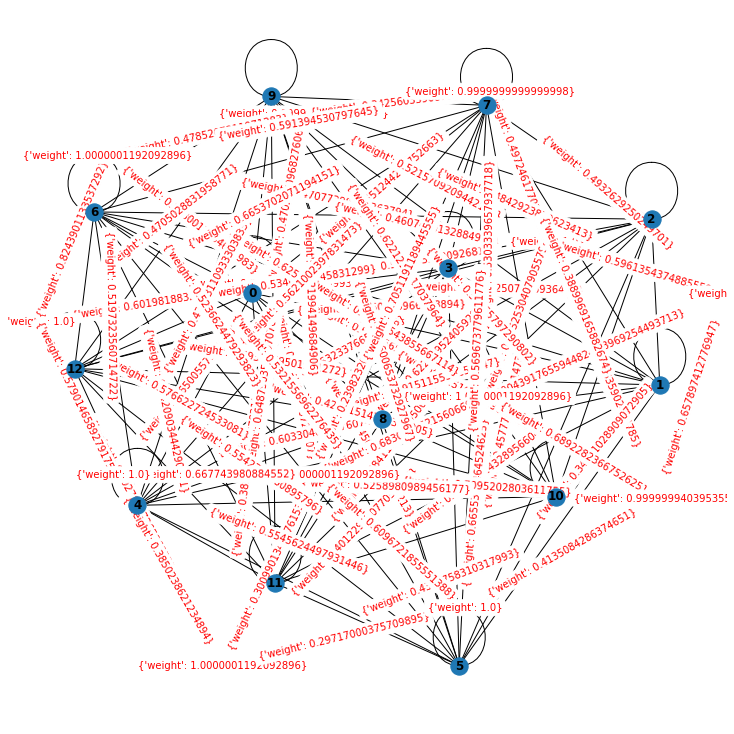

In [ ]:
draw_graphs(df['SimMatrix'][0])

In [ ]:
# pagerank 알고리즘을 사용하여 문장 점수 구하기
def calculate_score(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank_numpy(nx_graph)
    return scores

In [ ]:
df['score'] = df['SimMatrix'].apply(calculate_score)
df[['SimMatrix', 'score']]

<ipython-input-40-841609554d78>:4: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  scores = nx.pagerank_numpy(nx_graph)
/usr/local/lib/python3.8/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(
<ipython-input-41-99c66f413a46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['SimMatrix'].apply(calculate_score)


,SimMatrix,score
0,"[[0.9999999999999993, 0.566785228092681, 0.574...","{0: 0.07889854613799928, 1: 0.0799569984918240..."
1,"[[1.0, 0.3069650871653044, 0.5194716125482427,...","{0: 0.08227386469127157, 1: 0.0725432359860293..."
2,"[[0.9999998211860657, 0.32282114028930664, 0.1...","{0: 0.034456896803789355, 1: 0.063299545584828..."
3,"[[1.0000000000000004, 0.5953847349790337, 0.34...","{0: 0.11874633857161891, 1: 0.1384224272216732..."
4,"[[1.0, 0.3524049615824316, 0.2736445665359497,...","{0: 0.044398551168788006, 1: 0.070533057801179..."
...,...,...
4995,"[[1.0, 0.5342135598034135, 0.574021950068099, ...","{0: 0.061846713986427174, 1: 0.053502637240112..."
4996,"[[0.9999999403953552, 0.5238986015319824, 0.69...","{0: 0.06221657134902564, 1: 0.0623905294543044..."
4997,"[[1.0, 0.14097293873136563, 0.8428411167138881...","{0: 0.1429205133488162, 1: 0.07533523990974723..."
4998,"[[1.0000001192092896, 0.4271000714848523, 0.47...","{0: 0.1150199037973085, 1: 0.10463648413233421..."


In [ ]:
# 첫번째 샘플의 각 문장의 점수 출력
df['score'][0]

{0: 0.07889854613799928,
 1: 0.07995699849182406,
 2: 0.07414494797015163,
 3: 0.08492774422525398,
 4: 0.07769338912977511,
 5: 0.0613095042431652,
 6: 0.07444750617074808,
 7: 0.07563802898636407,
 8: 0.07918017416992824,
 9: 0.07688700287624838,
 10: 0.0827088199303075,
 11: 0.07362929837782409,
 12: 0.08057803929041048}

In [ ]:
# 점수가 가장 높은 문장 상위 n개 선택하여 정렬하여 반환
def ranked_sentences(sentences, scores, n=3):
    top_scores = sorted(((scores[i],s) 
                         for i,s in enumerate(sentences)), 
                                reverse=True)
    top_n_sentences = [sentence 
                        for score,sentence in top_scores[:n]]
    return " ".join(top_n_sentences)

In [ ]:
df['summary'] = df.apply(lambda x: 
                            ranked_sentences(x.sentences, 
                            x.score), axis=1)

df[['summary']]

<ipython-input-44-7d622e110068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summary'] = df.apply(lambda x:


,summary
0,"문 대통령은 ""5G가 각 분야에 융합되면, 정보통신산업을 넘어 자동차, 드론, 로봇..."
1,그러나 바른정당계 최고위원들은 이날도 지도부 퇴진을 요구했다. 바른정당계 하태경·이...
2,"그러나 이 공연은 5G 이동통신의 실시간 전송기술을 활용해 서울과 부산, 광주에서 ..."
3,"박 시장은 이날 서울시청에서 열린 '골목길 재생 시민 정책 대화'에 참석해 ""과거의..."
4,KB운용은 SK는 주요 자회사들이 적극적으로 배당을 한 덕분에 2017년에만 총 6...
...,...
4995,강남점이 이처럼 '학부형 클럽'을 운영하는 것은 인근 상권에 맞는 차별화된 회원제를...
4996,양사는 글로벌 소프트웨어 개발 거점을 포함한 다양한 사업 분야의 협력 방안을 수립하...
4997,"중소벤처기업부는 표준약정서 발급, 현금성 결제 확대 등을 통해 공정한 수탁·위탁거래..."
4998,"오는 11월까지 진행되는 이번 교육과정은 △창업, 투자유치, 글로벌 진출 관련 기본..."


In [ ]:
df['summary'][0]

'문 대통령은 "5G가 각 분야에 융합되면, 정보통신산업을 넘어 자동차, 드론, 로봇, 지능형 폐쇄회로TV를 비롯한 제조업과 벤처에 이르기까지 우리 산업 전체의 혁신을 통한 동반성장이 가능하다"고 밝혔다. 문 대통령은 세계 최초 상용화에 성공한 우리 5G 기술을 널리 알리는 홍보대사를 자처하기도 했다. 문 대통령은 "평창동계올림픽 360도 중계, 작년 4·27 남북한 정상회담 때 프레스센터에서 사용된 스마트월처럼 기회가 생기면 대통령부터 나서서 우리의 앞선 기술을 홍보하겠다"고 말했다.'

In [ ]:
# 원문과 요약문을 출력
for i in range(3):
  print(i+1,'번 문서')
  print('원문 :',df.loc[i+458].text)
  print('')
  print('정답 :',df.loc[i+458].sumExt)
  print('')
  print('요약 :',df.loc[i+458].summary)
  print('')

1 번 문서
원문 : 배우 송승헌이 킹콩 by 스타쉽과 전속계약을 체결했다. 12일 스타쉽 엔터테인먼트의 연기자 레이블 킹콩 by 스타쉽은 '송승헌과 한 식구가 됐다. 이에 킹콩 by 스타쉽과 송승헌이 동행하며 펼칠 시너지에 많은 기대와 응원 부탁드린다'고 밝혔다. 송승헌은 브라운관과 스크린을 통해 멜로부터 코미디, 블록버스터 등 다양한 장르와 캐릭터를 자신만의 색깔로 소화하며 폭넓은 스펙트럼을 쌓아왔다. 특히 국내뿐만 아니라 아시아 전역에서 뜨거운 사랑을 받고 있는 그는 명실상부 한류스타로 단단한 내공과 스타성까지 갖추며 배우로 자리매김했다. 송승헌과 매니지먼트 계약을 체결한 킹콩 by 스타쉽은 국내외에서 활발하게 활동을 펼치고 있는 배우들의 라인업을 탄탄하게 구축하고 있는 국내 최정상의 배우 전문 매니지먼트 회사로 김범, 김지원, 박희순, 유연석, 이광수, 이미연, 이동욱, 임수정, 조윤희, 채수빈 등이 소속돼 있다. 킹콩 by 스타쉽 이진성 대표는 '송승헌과 한 식구가 되어 그의 향후 행보를 함께 할 수 있어 기쁘다'며 '송승헌은 국내는 물론 해외에서도 큰 사랑을 받고 있는 스타다. 그가 다양한 장르와 작품, 캐릭터로 대중들과 호흡할 수 있도록 전폭적인 지원을 아끼지 않겠다'고 전했다. 한편, 스타쉽 엔터테인먼트를 보유하고 있는 카카오M은 막강한 한류 영향력을 지닌 배우군 확보를 위해 배우 매니지먼트에 대한 투자 및 인수를 지속하고 있다. 카카오M은 카카오 공동체가 보유한 IP, 자체 영상 제작 역량, 한류 스타 배우군 간 시너지 극대화를 통해 영상 산업 내 경쟁력을 강화해 나갈 예정이다.

정답 : 배우 송승헌이 킹콩 by 스타쉽과 전속계약을 체결했다. 12일 스타쉽 엔터테인먼트의 연기자 레이블 킹콩 by 스타쉽은 '송승헌과 한 식구가 됐다. 이에 킹콩 by 스타쉽과 송승헌이 동행하며 펼칠 시너지에 많은 기대와 응원 부탁드린다'고 밝혔다. 송승헌과 매니지먼트 계약을 체결한 킹콩 by 스타쉽은 국내외에서 활발하게 활동을 펼치고 있는 배우들의 라인업을 탄탄

# **3. 평가**

## **.**

In [ ]:
import os
import re
import platform
import itertools
import collections
import pkg_resources  # pip install py-rouge
from io import open


if platform.system() == "Windows":
    try:
        from eunjeon import Mecab
    except:
        print("please install eunjeon module")
else:  # Ubuntu일 경우
    from konlpy.tag import Mecab




class Rouge:
    DEFAULT_METRICS = {"rouge-n"}
    DEFAULT_N = 1
    STATS = ["f", "p", "r"]
    AVAILABLE_METRICS = {"rouge-n", "rouge-l", "rouge-w"}
    AVAILABLE_LENGTH_LIMIT_TYPES = {"words", "bytes"}
    REMOVE_CHAR_PATTERN = re.compile("[^A-Za-z0-9가-힣]")


    def __init__(
        self,
        metrics=None,
        max_n=None,
        limit_length=True,
        length_limit=1000,
        length_limit_type="words",
        apply_avg=True,
        apply_best=False,
        use_tokenizer=True,
        alpha=0.5,
        weight_factor=1.0,
    ):
        self.metrics = metrics[:] if metrics is not None else Rouge.DEFAULT_METRICS
        for m in self.metrics:
            if m not in Rouge.AVAILABLE_METRICS:
                raise ValueError("Unknown metric '{}'".format(m))


        self.max_n = max_n if "rouge-n" in self.metrics else None
        # Add all rouge-n metrics
        if self.max_n is not None:
            index_rouge_n = self.metrics.index("rouge-n")
            del self.metrics[index_rouge_n]
            self.metrics += ["rouge-{}".format(n) for n in range(1, self.max_n + 1)]
        self.metrics = set(self.metrics)


        self.limit_length = limit_length
        if self.limit_length:
            if length_limit_type not in Rouge.AVAILABLE_LENGTH_LIMIT_TYPES:
                raise ValueError("Unknown length_limit_type '{}'".format(length_limit_type))


        self.length_limit = length_limit
        if self.length_limit == 0:
            self.limit_length = False
        self.length_limit_type = length_limit_type


        self.use_tokenizer = use_tokenizer
        if use_tokenizer:
            self.tokenizer = Mecab()


        self.apply_avg = apply_avg
        self.apply_best = apply_best
        self.alpha = alpha
        self.weight_factor = weight_factor
        if self.weight_factor <= 0:
            raise ValueError("ROUGE-W weight factor must greater than 0.")


    def tokenize_text(self, text):
        if self.use_tokenizer:
            return self.tokenizer.morphs(text)
        else:
            return text


    @staticmethod
    def split_into_sentences(text):
        return text.split("\n")


    @staticmethod
    def _get_ngrams(n, text):
        ngram_set = collections.defaultdict(int)
        max_index_ngram_start = len(text) - n
        for i in range(max_index_ngram_start + 1):
            ngram_set[tuple(text[i : i + n])] += 1
        return ngram_set


    @staticmethod
    def _split_into_words(sentences):
        return list(itertools.chain(*[_.split() for _ in sentences]))


    @staticmethod
    def _get_word_ngrams_and_length(n, sentences):
        assert len(sentences) > 0
        assert n > 0


        tokens = Rouge._split_into_words(sentences)
        return Rouge._get_ngrams(n, tokens), tokens, len(tokens) - (n - 1)


    @staticmethod
    def _get_unigrams(sentences):
        assert len(sentences) > 0


        tokens = Rouge._split_into_words(sentences)
        unigram_set = collections.defaultdict(int)
        for token in tokens:
            unigram_set[token] += 1
        return unigram_set, len(tokens)


    @staticmethod
    def _compute_p_r_f_score(
        evaluated_count,
        reference_count,
        overlapping_count,
        alpha=0.5,
        weight_factor=1.0,
    ):
        precision = 0.0 if evaluated_count == 0 else overlapping_count / float(evaluated_count)
        if weight_factor != 1.0:
            precision = precision ** (1.0 / weight_factor)
        recall = 0.0 if reference_count == 0 else overlapping_count / float(reference_count)
        if weight_factor != 1.0:
            recall = recall ** (1.0 / weight_factor)
        f1_score = Rouge._compute_f_score(precision, recall, alpha)
        return {"f": f1_score, "p": precision, "r": recall}


    @staticmethod
    def _compute_f_score(precision, recall, alpha=0.5):
        return (
            0.0
            if (recall == 0.0 or precision == 0.0)
            else precision * recall / ((1 - alpha) * precision + alpha * recall)
        )


    @staticmethod
    def _compute_ngrams(evaluated_sentences, reference_sentences, n):
        if len(evaluated_sentences) <= 0 or len(reference_sentences) <= 0:
            raise ValueError("Collections must contain at least 1 sentence.")


        evaluated_ngrams, _, evaluated_count = Rouge._get_word_ngrams_and_length(
            n, evaluated_sentences
        )
        reference_ngrams, _, reference_count = Rouge._get_word_ngrams_and_length(
            n, reference_sentences
        )


        # Gets the overlapping ngrams between evaluated and reference
        overlapping_ngrams = set(evaluated_ngrams.keys()).intersection(set(reference_ngrams.keys()))
        overlapping_count = 0
        for ngram in overlapping_ngrams:
            overlapping_count += min(evaluated_ngrams[ngram], reference_ngrams[ngram])


        return evaluated_count, reference_count, overlapping_count


    @staticmethod
    def _compute_ngrams_lcs(evaluated_sentences, reference_sentences, weight_factor=1.0):
        def _lcs(x, y):
            m = len(x)
            n = len(y)
            vals = collections.defaultdict(int)
            dirs = collections.defaultdict(int)


            for i in range(1, m + 1):
                for j in range(1, n + 1):
                    if x[i - 1] == y[j - 1]:
                        vals[i, j] = vals[i - 1, j - 1] + 1
                        dirs[i, j] = "|"
                    elif vals[i - 1, j] >= vals[i, j - 1]:
                        vals[i, j] = vals[i - 1, j]
                        dirs[i, j] = "^"
                    else:
                        vals[i, j] = vals[i, j - 1]
                        dirs[i, j] = "<"


            return vals, dirs


        def _wlcs(x, y, weight_factor):
            m = len(x)
            n = len(y)
            vals = collections.defaultdict(float)
            dirs = collections.defaultdict(int)
            lengths = collections.defaultdict(int)


            for i in range(1, m + 1):
                for j in range(1, n + 1):
                    if x[i - 1] == y[j - 1]:
                        length_tmp = lengths[i - 1, j - 1]
                        vals[i, j] = (
                            vals[i - 1, j - 1]
                            + (length_tmp + 1) ** weight_factor
                            - length_tmp ** weight_factor
                        )
                        dirs[i, j] = "|"
                        lengths[i, j] = length_tmp + 1
                    elif vals[i - 1, j] >= vals[i, j - 1]:
                        vals[i, j] = vals[i - 1, j]
                        dirs[i, j] = "^"
                        lengths[i, j] = 0
                    else:
                        vals[i, j] = vals[i, j - 1]
                        dirs[i, j] = "<"
                        lengths[i, j] = 0


            return vals, dirs


        def _mark_lcs(mask, dirs, m, n):
            while m != 0 and n != 0:
                if dirs[m, n] == "|":
                    m -= 1
                    n -= 1
                    mask[m] = 1
                elif dirs[m, n] == "^":
                    m -= 1
                elif dirs[m, n] == "<":
                    n -= 1
                else:
                    raise UnboundLocalError("Illegal move")


            return mask


        if len(evaluated_sentences) <= 0 or len(reference_sentences) <= 0:
            raise ValueError("Collections must contain at least 1 sentence.")


        evaluated_unigrams_dict, evaluated_count = Rouge._get_unigrams(evaluated_sentences)
        reference_unigrams_dict, reference_count = Rouge._get_unigrams(reference_sentences)


        # Has to use weight factor for WLCS
        use_WLCS = weight_factor != 1.0
        if use_WLCS:
            evaluated_count = evaluated_count ** weight_factor
            reference_count = 0


        overlapping_count = 0.0
        for reference_sentence in reference_sentences:
            reference_sentence_tokens = reference_sentence.split()
            if use_WLCS:
                reference_count += len(reference_sentence_tokens) ** weight_factor
            hit_mask = [0 for _ in range(len(reference_sentence_tokens))]


            for evaluated_sentence in evaluated_sentences:
                evaluated_sentence_tokens = evaluated_sentence.split()


                if use_WLCS:
                    _, lcs_dirs = _wlcs(
                        reference_sentence_tokens,
                        evaluated_sentence_tokens,
                        weight_factor,
                    )
                else:
                    _, lcs_dirs = _lcs(reference_sentence_tokens, evaluated_sentence_tokens)
                _mark_lcs(
                    hit_mask,
                    lcs_dirs,
                    len(reference_sentence_tokens),
                    len(evaluated_sentence_tokens),
                )


            overlapping_count_length = 0
            for ref_token_id, val in enumerate(hit_mask):
                if val == 1:
                    token = reference_sentence_tokens[ref_token_id]
                    if evaluated_unigrams_dict[token] > 0 and reference_unigrams_dict[token] > 0:
                        evaluated_unigrams_dict[token] -= 1
                        reference_unigrams_dict[ref_token_id] -= 1


                        if use_WLCS:
                            overlapping_count_length += 1
                            if (
                                ref_token_id + 1 < len(hit_mask) and hit_mask[ref_token_id + 1] == 0
                            ) or ref_token_id + 1 == len(hit_mask):
                                overlapping_count += overlapping_count_length ** weight_factor
                                overlapping_count_length = 0
                        else:
                            overlapping_count += 1


        if use_WLCS:
            reference_count = reference_count ** weight_factor


        return evaluated_count, reference_count, overlapping_count


    def get_scores(self, hypothesis, references):
        if isinstance(hypothesis, str):
            hypothesis, references = [hypothesis], [references]


        if type(hypothesis) != type(references):
            raise ValueError("'hyps' and 'refs' are not of the same type")


        if len(hypothesis) != len(references):
            raise ValueError("'hyps' and 'refs' do not have the same length")
        scores = {}
        has_rouge_n_metric = (
            len([metric for metric in self.metrics if metric.split("-")[-1].isdigit()]) > 0
        )
        if has_rouge_n_metric:
            scores.update(self._get_scores_rouge_n(hypothesis, references))
            # scores = {**scores, **self._get_scores_rouge_n(hypothesis, references)}


        has_rouge_l_metric = (
            len([metric for metric in self.metrics if metric.split("-")[-1].lower() == "l"]) > 0
        )
        if has_rouge_l_metric:
            scores.update(self._get_scores_rouge_l_or_w(hypothesis, references, False))
            # scores = {**scores, **self._get_scores_rouge_l_or_w(hypothesis, references, False)}


        has_rouge_w_metric = (
            len([metric for metric in self.metrics if metric.split("-")[-1].lower() == "w"]) > 0
        )
        if has_rouge_w_metric:
            scores.update(self._get_scores_rouge_l_or_w(hypothesis, references, True))
            # scores = {**scores, **self._get_scores_rouge_l_or_w(hypothesis, references, True)}


        return scores


    def _get_scores_rouge_n(self, all_hypothesis, all_references):
        metrics = [metric for metric in self.metrics if metric.split("-")[-1].isdigit()]


        if self.apply_avg or self.apply_best:
            scores = {metric: {stat: 0.0 for stat in Rouge.STATS} for metric in metrics}
        else:
            scores = {
                metric: [{stat: [] for stat in Rouge.STATS} for _ in range(len(all_hypothesis))]
                for metric in metrics
            }


        for sample_id, (hypothesis, references) in enumerate(zip(all_hypothesis, all_references)):
            assert isinstance(hypothesis, str)
            has_multiple_references = False
            if isinstance(references, list):
                has_multiple_references = len(references) > 1
                if not has_multiple_references:
                    references = references[0]


            # Prepare hypothesis and reference(s)
            hypothesis = self._preprocess_summary_as_a_whole(hypothesis)
            references = (
                [self._preprocess_summary_as_a_whole(reference) for reference in references]
                if has_multiple_references
                else [self._preprocess_summary_as_a_whole(references)]
            )


            # Compute scores
            for metric in metrics:
                suffix = metric.split("-")[-1]
                n = int(suffix)


                # Aggregate
                if self.apply_avg:
                    # average model
                    total_hypothesis_ngrams_count = 0
                    total_reference_ngrams_count = 0
                    total_ngrams_overlapping_count = 0


                    for reference in references:
                        (
                            hypothesis_count,
                            reference_count,
                            overlapping_ngrams,
                        ) = Rouge._compute_ngrams(hypothesis, reference, n)
                        total_hypothesis_ngrams_count += hypothesis_count
                        total_reference_ngrams_count += reference_count
                        total_ngrams_overlapping_count += overlapping_ngrams


                    score = Rouge._compute_p_r_f_score(
                        total_hypothesis_ngrams_count,
                        total_reference_ngrams_count,
                        total_ngrams_overlapping_count,
                        self.alpha,
                    )


                    for stat in Rouge.STATS:
                        scores[metric][stat] += score[stat]
                else:
                    # Best model
                    if self.apply_best:
                        best_current_score = None
                        for reference in references:
                            (
                                hypothesis_count,
                                reference_count,
                                overlapping_ngrams,
                            ) = Rouge._compute_ngrams(hypothesis, reference, n)
                            score = Rouge._compute_p_r_f_score(
                                hypothesis_count,
                                reference_count,
                                overlapping_ngrams,
                                self.alpha,
                            )
                            if best_current_score is None or score["r"] > best_current_score["r"]:
                                best_current_score = score


                        for stat in Rouge.STATS:
                            scores[metric][stat] += best_current_score[stat]
                    # Keep all
                    else:
                        for reference in references:
                            (
                                hypothesis_count,
                                reference_count,
                                overlapping_ngrams,
                            ) = Rouge._compute_ngrams(hypothesis, reference, n)
                            score = Rouge._compute_p_r_f_score(
                                hypothesis_count,
                                reference_count,
                                overlapping_ngrams,
                                self.alpha,
                            )
                            for stat in Rouge.STATS:
                                scores[metric][sample_id][stat].append(score[stat])


        # Compute final score with the average or the the max
        if (self.apply_avg or self.apply_best) and len(all_hypothesis) > 1:
            for metric in metrics:
                for stat in Rouge.STATS:
                    scores[metric][stat] /= len(all_hypothesis)


        return scores


    def _get_scores_rouge_l_or_w(self, all_hypothesis, all_references, use_w=False):
        metric = "rouge-w" if use_w else "rouge-l"
        if self.apply_avg or self.apply_best:
            scores = {metric: {stat: 0.0 for stat in Rouge.STATS}}
        else:
            scores = {
                metric: [{stat: [] for stat in Rouge.STATS} for _ in range(len(all_hypothesis))]
            }


        for sample_id, (hypothesis_sentences, references_sentences) in enumerate(
            zip(all_hypothesis, all_references)
        ):
            assert isinstance(hypothesis_sentences, str)
            has_multiple_references = False
            if isinstance(references_sentences, list):
                has_multiple_references = len(references_sentences) > 1
                if not has_multiple_references:
                    references_sentences = references_sentences[0]


            # Prepare hypothesis and reference(s)
            hypothesis_sentences = self._preprocess_summary_per_sentence(hypothesis_sentences)
            references_sentences = (
                [
                    self._preprocess_summary_per_sentence(reference)
                    for reference in references_sentences
                ]
                if has_multiple_references
                else [self._preprocess_summary_per_sentence(references_sentences)]
            )


            # Compute scores
            # Aggregate
            if self.apply_avg:
                # average model
                total_hypothesis_ngrams_count = 0
                total_reference_ngrams_count = 0
                total_ngrams_overlapping_count = 0


                for reference_sentences in references_sentences:
                    (
                        hypothesis_count,
                        reference_count,
                        overlapping_ngrams,
                    ) = Rouge._compute_ngrams_lcs(
                        hypothesis_sentences,
                        reference_sentences,
                        self.weight_factor if use_w else 1.0,
                    )
                    total_hypothesis_ngrams_count += hypothesis_count
                    total_reference_ngrams_count += reference_count
                    total_ngrams_overlapping_count += overlapping_ngrams


                score = Rouge._compute_p_r_f_score(
                    total_hypothesis_ngrams_count,
                    total_reference_ngrams_count,
                    total_ngrams_overlapping_count,
                    self.alpha,
                    self.weight_factor if use_w else 1.0,
                )
                for stat in Rouge.STATS:
                    scores[metric][stat] += score[stat]
            else:
                # Best model
                if self.apply_best:
                    best_current_score = None
                    best_current_score_wlcs = None
                    for reference_sentences in references_sentences:
                        (
                            hypothesis_count,
                            reference_count,
                            overlapping_ngrams,
                        ) = Rouge._compute_ngrams_lcs(
                            hypothesis_sentences,
                            reference_sentences,
                            self.weight_factor if use_w else 1.0,
                        )
                        score = Rouge._compute_p_r_f_score(
                            total_hypothesis_ngrams_count,
                            total_reference_ngrams_count,
                            total_ngrams_overlapping_count,
                            self.alpha,
                            self.weight_factor if use_w else 1.0,
                        )


                        if use_w:
                            reference_count_for_score = reference_count ** (
                                1.0 / self.weight_factor
                            )
                            overlapping_ngrams_for_score = overlapping_ngrams
                            score_wlcs = (
                                overlapping_ngrams_for_score / reference_count_for_score
                            ) ** (1.0 / self.weight_factor)


                            if (
                                best_current_score_wlcs is None
                                or score_wlcs > best_current_score_wlcs
                            ):
                                best_current_score = score
                                best_current_score_wlcs = score_wlcs
                        else:
                            if best_current_score is None or score["r"] > best_current_score["r"]:
                                best_current_score = score


                    for stat in Rouge.STATS:
                        scores[metric][stat] += best_current_score[stat]
                # Keep all
                else:
                    for reference_sentences in references_sentences:
                        (
                            hypothesis_count,
                            reference_count,
                            overlapping_ngrams,
                        ) = Rouge._compute_ngrams_lcs(
                            hypothesis_sentences,
                            reference_sentences,
                            self.weight_factor if use_w else 1.0,
                        )
                        score = Rouge._compute_p_r_f_score(
                            hypothesis_count,
                            reference_count,
                            overlapping_ngrams,
                            self.alpha,
                            self.weight_factor,
                        )


                        for stat in Rouge.STATS:
                            scores[metric][sample_id][stat].append(score[stat])


        # Compute final score with the average or the the max
        if (self.apply_avg or self.apply_best) and len(all_hypothesis) > 1:
            for stat in Rouge.STATS:
                scores[metric][stat] /= len(all_hypothesis)


        return scores


    def _preprocess_summary_as_a_whole(self, summary):
        sentences = Rouge.split_into_sentences(summary)


        # Truncate
        if self.limit_length:
            # By words
            if self.length_limit_type == "words":
                summary = " ".join(sentences)
                all_tokens = summary.split()  # Counting as in the perls script
                summary = " ".join(all_tokens[: self.length_limit])


            # By bytes
            elif self.length_limit_type == "bytes":
                summary = ""
                current_len = 0
                for sentence in sentences:
                    sentence = sentence.strip()
                    sentence_len = len(sentence)


                    if current_len + sentence_len < self.length_limit:
                        if current_len != 0:
                            summary += " "
                        summary += sentence
                        current_len += sentence_len
                    else:
                        if current_len > 0:
                            summary += " "
                        summary += sentence[: self.length_limit - current_len]
                        break
        else:
            summary = " ".join(sentences)


        summary = Rouge.REMOVE_CHAR_PATTERN.sub(" ", summary.lower()).strip()


        tokens = self.tokenize_text(Rouge.REMOVE_CHAR_PATTERN.sub(" ", summary))
        preprocessed_summary = [" ".join(tokens)]


        return preprocessed_summary


    def _preprocess_summary_per_sentence(self, summary):
        sentences = Rouge.split_into_sentences(summary)


        # Truncate
        if self.limit_length:
            final_sentences = []
            current_len = 0
            # By words
            if self.length_limit_type == "words":
                for sentence in sentences:
                    tokens = sentence.strip().split()
                    tokens_len = len(tokens)
                    if current_len + tokens_len < self.length_limit:
                        sentence = " ".join(tokens)
                        final_sentences.append(sentence)
                        current_len += tokens_len
                    else:
                        sentence = " ".join(tokens[: self.length_limit - current_len])
                        final_sentences.append(sentence)
                        break
            # By bytes
            elif self.length_limit_type == "bytes":
                for sentence in sentences:
                    sentence = sentence.strip()
                    sentence_len = len(sentence)
                    if current_len + sentence_len < self.length_limit:
                        final_sentences.append(sentence)
                        current_len += sentence_len
                    else:
                        sentence = sentence[: self.length_limit - current_len]
                        final_sentences.append(sentence)
                        break
            sentences = final_sentences


        final_sentences = []
        for sentence in sentences:
            sentence = Rouge.REMOVE_CHAR_PATTERN.sub(" ", sentence.lower()).strip()


            tokens = self.tokenize_text(Rouge.REMOVE_CHAR_PATTERN.sub(" ", sentence))


            sentence = " ".join(tokens)


            final_sentences.append(sentence)


        return final_sentences

In [ ]:
import argparse
import pandas as pd
from tqdm import tqdm
# from rouge_metric import Rouge

class RougeScorer:
    def __init__(self):
        self.rouge_evaluator = Rouge(
            metrics=["rouge-n", "rouge-l"],
            max_n=2,
            limit_length=True,
            length_limit=1000,
            length_limit_type="words",
            use_tokenizer=True,
            apply_avg=True,
            apply_best=False,
            alpha=0.5,  # Default F1_score
            weight_factor=1.2,
        )

    def compute_rouge(self, ref_df, hyp_df):
        #ref_df = pd.read_csv(ref_path)
        #hyp_df = pd.read_csv(hyp_path)
        hyp_df.iloc[:,1] = hyp_df.iloc[:,1].fillna(' ')
        ids = ref_df['id']
        hyp_df = hyp_df[hyp_df['id'].isin(ids)]
        hyp_df.index = ref_df.index

        ref_df = ref_df.sort_values(by=["id"])
        hyp_df = hyp_df.sort_values(by=["id"])
        ref_df["id"] = ref_df["id"].astype(int)
        hyp_df["id"] = hyp_df["id"].astype(int)

        hyps = [tuple(row) for row in hyp_df.values]
        refs = [tuple(row) for row in ref_df.values]

        reference_summaries = []
        generated_summaries = []

        for ref_tp, hyp_tp in zip(refs, hyps):
            ref_id, ref = ref_tp
            hyp_id, hyp = hyp_tp

            assert ref_id == hyp_id

            reference_summaries.append(ref)
            generated_summaries.append(hyp)

        scores = self.rouge_evaluator.get_scores(generated_summaries, reference_summaries)
        str_scores = self.format_rouge_scores(scores)
        #self.save_rouge_scores(str_scores)
        return str_scores

    def save_rouge_scores(self, str_scores):
        with open("/content/drive/MyDrive/KoBART-summarization/requirements.txt", "w") as output:
            output.write(str_scores)

    def format_rouge_scores(self, scores):
    	# return "{:.3f},{:.3f},{:.3f}".format(
      #       scores["rouge-1"]["f"],
      #       scores["rouge-2"]["f"],
      #       scores["rouge-l"]["f"],
      #   )
      return """\n
    ****** ROUGE SCORES ******
    ** ROUGE 1
    F1        >> {:.3f}
    Precision >> {:.3f}
    Recall    >> {:.3f}
    ** ROUGE 2
    F1        >> {:.3f}
    Precision >> {:.3f}
    Recall    >> {:.3f}
    ** ROUGE L
    F1        >> {:.3f}
    Precision >> {:.3f}
    Recall    >> {:.3f}""".format(
            scores["rouge-1"]["f"],
            scores["rouge-1"]["p"],
            scores["rouge-1"]["r"],
            scores["rouge-2"]["f"],
            scores["rouge-2"]["p"],
            scores["rouge-2"]["r"],
            scores["rouge-l"]["f"],
            scores["rouge-l"]["p"],
            scores["rouge-l"]["r"],
        )

## **점수**

In [ ]:
ref_df = df['sumExt']
hyp_df = df['summary']

In [ ]:
id = []

for i in range(len(ref_df)):
  id.append(i)

df_id = pd.DataFrame(id, columns=['id'])
ref_df = pd.concat([df_id, ref_df], axis=1)
hyp_df = pd.concat([df_id, hyp_df], axis=1)

In [ ]:
ref_df

,id,sumExt
0,0,"'대한민국 5G 홍보대사'를 자처한 문재인 대통령은 ""넓고, 체증 없는 '통신 고..."
1,1,바른미래당이 8일 연 최고위원 회의에는 7명의 최고위원 중 손학규 대표와 김관영 원...
2,2,지난 3일 한국이 세계 최초로 5세대 이동통신 서비스를 상용화한 것을 기념하는 '코...
3,3,박원순 서울시장이 8일 고층 재개발·재건축 관련 요구에 작심한 듯 쓴소리를 쏟아냈...
4,4,기업 지배구조 개선 등을 통해 높은 수익률을 올리는 것을 목표로 하는 공모펀드 'K...
...,...,...
4995,4995,롯데백화점 강남점이 오는 29일부터 '학부형 클럽'을 운영한다. 강남점 주변에는 자...
4996,4996,삼성SDS가 베트남 IT서비스기업 CMC 최대주주가 됐다. 삼성SDS는 CMC와 베...
4997,4997,"중소벤처기업부는 표준약정서 발급, 현금성 결제 확대 등을 통해 공정한 수탁·위탁거래..."
4998,4998,한국무역협회는 산학협동재단과 공동으로 삼성동 코엑스에서 '2019 글로벌 스타트업 ...


In [ ]:
hyp_df

,id,summary
0,0,"문 대통령은 ""5G가 각 분야에 융합되면, 정보통신산업을 넘어 자동차, 드론, 로봇..."
1,1,그러나 바른정당계 최고위원들은 이날도 지도부 퇴진을 요구했다. 바른정당계 하태경·이...
2,2,"그러나 이 공연은 5G 이동통신의 실시간 전송기술을 활용해 서울과 부산, 광주에서 ..."
3,3,"박 시장은 이날 서울시청에서 열린 '골목길 재생 시민 정책 대화'에 참석해 ""과거의..."
4,4,KB운용은 SK는 주요 자회사들이 적극적으로 배당을 한 덕분에 2017년에만 총 6...
...,...,...
4995,4995,강남점이 이처럼 '학부형 클럽'을 운영하는 것은 인근 상권에 맞는 차별화된 회원제를...
4996,4996,양사는 글로벌 소프트웨어 개발 거점을 포함한 다양한 사업 분야의 협력 방안을 수립하...
4997,4997,"중소벤처기업부는 표준약정서 발급, 현금성 결제 확대 등을 통해 공정한 수탁·위탁거래..."
4998,4998,"오는 11월까지 진행되는 이번 교육과정은 △창업, 투자유치, 글로벌 진출 관련 기본..."


In [ ]:
scorer = RougeScorer()
scores = scorer.compute_rouge(ref_df, hyp_df)

print(scores)



    ****** ROUGE SCORES ******
    ** ROUGE 1
    F1        >> 0.505
    Precision >> 0.472
    Recall    >> 0.566
    ** ROUGE 2
    F1        >> 0.348
    Precision >> 0.328
    Recall    >> 0.385
    ** ROUGE L
    F1        >> 0.368
    Precision >> 0.345
    Recall    >> 0.410
